# 4. Data Preparation

    เพื่อเตรียมข้อมูลให้พร้อมก่อนการนำไปวิเคราะห์ และสร้างโมเดล มีหลายเทคนิค เช่น Cleaning, Selecting, Transforming

                                                                                        Data Science ง่าย . . by New ew ew

In [1]:
!pip install Image

In [2]:
!pip install scikit-learn

## 1) Data Quality

แก้ไขปัญหาที่อาจเกิดจากข้อมูลที่คุณภาพไม่ดีต่างๆ เช่น Noise, Outliers, Missing values, Duplicate data

In [3]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [4]:
pd.set_option("max_rows", None)
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [5]:
# Missing values
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [6]:
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20    10
21     7
22     1
23     1
24     1
Name: Bare Nuclei, dtype: object


In [7]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


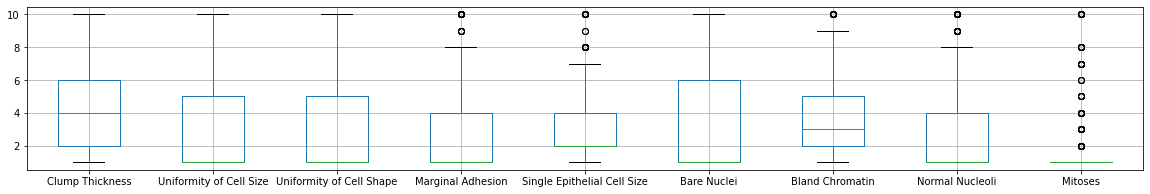

In [8]:
# Outliers
%matplotlib inline

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

In [9]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


In [10]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))
print(Z2)

Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632
     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0           0.206788                -0.699494                 -0.742767   
1           0.206788                 0.283642                  0.266684   
2          -0.503505                -0.699494                 -0.742767   
3           0.561934                 1.594490                  1.612618   
4          -0.148359                -0.699494                 -0.742767   
5           1.272227                 2.249915                  2.285586   
6          -1.213798                -0.699494                 -0.742767   
7          -0.858651                -0.699494                 -0.406284   
8          -0.858651                -0.699494                 -0.742767   
9          -0.148359                -0.371782                 -0.742767   
10         -1.213798                -0.699494                 -0.742767   

In [11]:
# Duplicate Data
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


In [12]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


## 2) Aggregation

เป็นการรวมข้อมูลหลายๆ ข้อมูลให้เหลือข้อมูลเดียว เพื่อ 1) ลดขนาดของข้อมูล 2) ปรับมุมมองการวิเคราะห์ข้อมูล 3) เพิ่มความเสถียรของข้อมูล

Text(0.5, 1.0, 'Daily Precipitation (variance = 0.0530)')

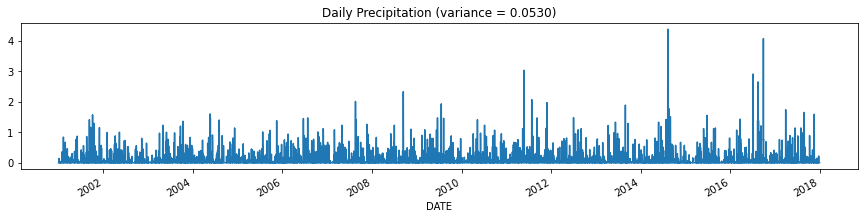

In [13]:
# Daily precipitation time series data for weather station located at Detroit Metro Airport
daily = pd.read_csv('04_DTW_prec.csv', header='infer')
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

Text(0.5, 1.0, 'Monthly Precipitation (variance = 2.4241)')

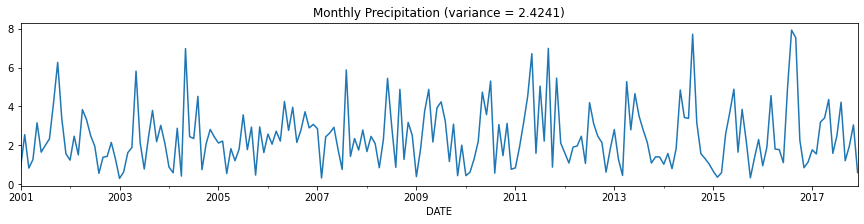

In [14]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

Text(0.5, 1.0, 'Annual Precipitation (variance = 23.6997)')

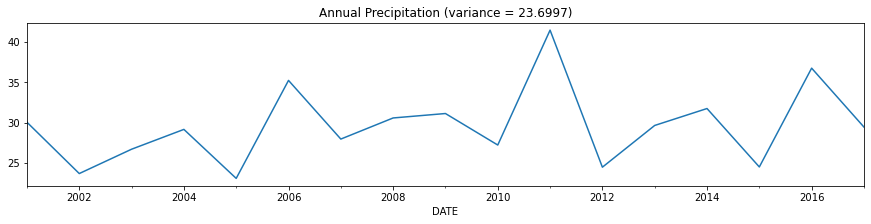

In [15]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

## 3) Sampling

In [16]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [17]:
sample = data.sample(n=3)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
501,4,1,1,1,2,1,2,1,1,2
598,3,1,1,1,2,1,2,1,1,2
52,10,3,6,2,3,5,4,10,2,4


In [25]:
sample = data.sample(frac=0.01, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
584,5,1,1,6,3,1,1,1,1,2
417,1,1,1,1,2,1,2,1,1,2
606,4,1,1,2,2,1,1,1,1,2
349,4,2,3,5,3,8,7,6,1,4
134,3,1,1,1,3,1,2,1,1,2
502,4,1,1,2,2,1,2,1,1,2
117,4,5,5,10,4,10,7,5,8,4


In [21]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
129,1,1,1,1,10,1,1,1,1,2
583,3,1,1,1,2,1,1,1,1,2


## 4) Discretization

1     145
2      50
3     108
4      80
5     130
6      34
7      23
8      46
9      14
10     69
Name: Clump Thickness, dtype: int64

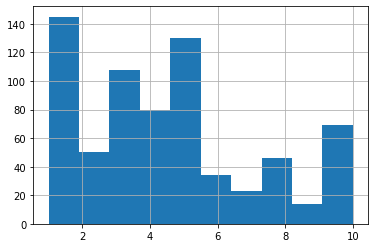

In [26]:
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)

In [27]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: Clump Thickness, dtype: int64

In [28]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: Clump Thickness, dtype: int64

## 5) Principal Component Analysis

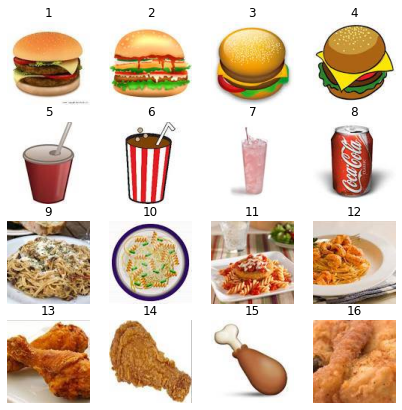

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import PIL

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,36963))

for i in range(1,numImages+1):
    filename = '04_pics/Picture'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

In [30]:
img

array([[[255, 231, 191],
        [255, 215, 174],
        [243, 190, 148],
        ...,
        [253, 173, 114],
        [250, 174, 116],
        [249, 172, 118]],

       [[255, 222, 183],
        [255, 211, 171],
        [248, 195, 151],
        ...,
        [253, 173, 114],
        [251, 175, 117],
        [251, 174, 120]],

       [[255, 208, 168],
        [255, 202, 161],
        [251, 194, 151],
        ...,
        [249, 169, 110],
        [247, 171, 113],
        [248, 171, 117]],

       ...,

       [[178,  98,  45],
        [186, 106,  53],
        [189, 109,  56],
        ...,
        [192, 129,  75],
        [194, 131,  77],
        [193, 130,  77]],

       [[189, 109,  56],
        [199, 119,  66],
        [194, 114,  61],
        ...,
        [191, 125,  73],
        [197, 134,  81],
        [195, 132,  79]],

       [[197, 120,  66],
        [211, 134,  80],
        [198, 121,  67],
        ...,
        [185, 119,  69],
        [196, 130,  80],
        [198, 132,  82]]

In [31]:
img.flatten()

array([255, 231, 191, ..., 198, 132,  82], dtype=uint8)

In [32]:
imgData

array([[255., 255., 255., ..., 244., 244., 244.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 252., 254., ..., 185., 182., 177.],
       [254., 255., 249., ..., 255., 255., 255.],
       [255., 231., 191., ..., 198., 132.,  82.]])

In [33]:
len(imgData)

16

In [34]:
print(imgData.shape, type(imgData))

(16, 36963) <class 'numpy.ndarray'>


In [35]:
print(imgData[5,:])

[255. 255. 255. ... 255. 255. 255.]


In [36]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','drink','drink','drink','drink',
                      'pasta', 'pasta', 'pasta', 'pasta', 'chicken', 'chicken', 'chicken', 'chicken']
projected

,pc1,pc2,food
1,-1592.807510,6651.952056,burger
2,-513.014301,6333.727586,burger
3,963.269946,7209.073951,burger
4,2165.089700,9039.653001,burger
5,-7842.607804,-1065.623606,drink
6,-8458.959250,-5386.328263,drink
7,-11181.664037,-5357.981131,drink
8,-6830.990008,1129.829550,drink
9,7639.840140,-5060.435533,pasta
10,-704.485243,-532.287743,pasta


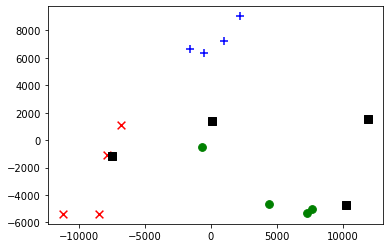

In [37]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'drink':'r', 'pasta':'g', 'chicken':'k'}
markerTypes = {'burger':'+', 'drink':'x', 'pasta':'o', 'chicken':'s'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])

## สรุปเนื้อหา

1. Data Quality : Noise, Outliers, Missing values, Duplicate data

2. Aggregation : Combine data 1) Reduce data size 2) Changning analysis 3) Stability of data

3. Sampling : for exploratory data analysis and scale to big data applications, uncertainties

4. Discretization : Transform continuous value to category

5. Principal Component Analysis : Reducing number of attributes in the data